In [ ]:
# Імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical



1. Завантажити та розділити датасет  cifar_10  на тренувальний та тестовий набори.

x_train original shape (60000, 28, 28)
y_train original shape (60000,)


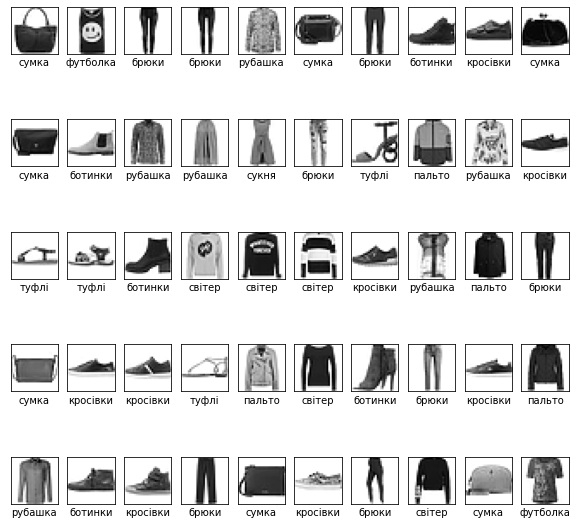

In [ ]:
# Завантаження та розділення датасету
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)


classes = ['футболка', 'брюки', 'світер', 'сукня', 'пальто', 'туфлі', 'рубашка', 'кросівки', 'сумка', 'ботинки']

plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])



2. Нормалізувати дані для швидшого та ефективнішого тренування мережі.

In [ ]:
# Нормалізація даних
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Перетворення міток в категоріальні дані
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

3. Створити нейронну мережу з використанням Keras з чотирма шарами (повністю з'єднані).

Встановити необхідну кількість вузлів на кожному шарі та використати підходящі функції активації.

Задати функцію втрат та оптимізатор для тренування.

Підберіть оптимальну кількість епох. Пам’ятайте про проблему перенавчання.

In [ ]:
# Будівництво моделі
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Плоский шар для згладжування зображення
    layers.Dense(128, activation="relu"),   # Повністю з'єднаний шар з 128 вузлами
    layers.Dense(64, activation="relu"),    # Повністю з'єднаний шар з 64 вузлами
    layers.Dense(32, activation="relu"),    # Повністю з'єднаний шар з 32 вузлами
    layers.Dense(10, activation="softmax")  # Вихідний шар з 10 вузлами та функцією активації softmax
])

# Компіляція моделі
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Виведення інформації про модель
model.summary()

# Тренування моделі
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==========================

4. Вивести графіки функції втрат та точності

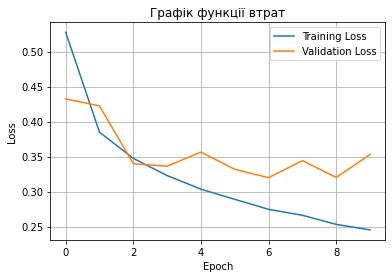

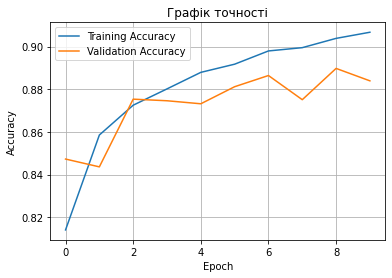

In [ ]:
# Виведення графіків функції втрат та точності
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Графік функції втрат")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Графік точності")
plt.grid()
plt.legend()
plt.show()



5. Оцінити точність моделі на тестовому наборі.

313/313 - 1s - loss: 0.3819 - accuracy: 0.8750 - 897ms/epoch - 3ms/step

Test Accuracy: 87.50%
Image 1: Predicted Class 0, True Class 0
Image 2: Predicted Class 7, True Class 7
Image 3: Predicted Class 8, True Class 8
Image 4: Predicted Class 2, True Class 2
Image 5: Predicted Class 3, True Class 3
Image 6: Predicted Class 6, True Class 0
Image 7: Predicted Class 9, True Class 9
Image 8: Predicted Class 8, True Class 8
Image 9: Predicted Class 3, True Class 3
Image 10: Predicted Class 1, True Class 1


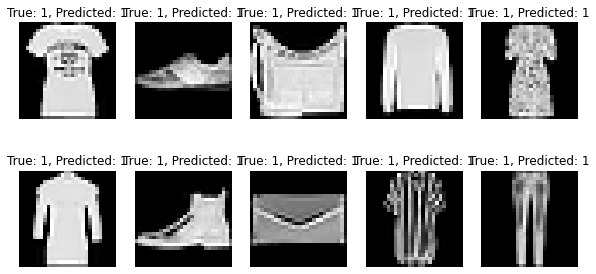

In [ ]:
# Оцінка точності на тестовому наборі
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")

6. Вибрати 10 випадкових зображень з тестового набору та використати навчену модель для їх класифікації.

Вивести спрогнозовані класи та порівняти їх із справжніми класами.

In [ ]:
# Розпізнавання 10 випадкових зображень
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)
random_images = x_test[random_indices]
predictions = model.predict(random_images)

# Виведення результатів розпізнавання
for i in range(10):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[random_indices[i]])
    print(f"Image {i + 1}: Predicted Class {predicted_class}, True Class {true_class}")

# Виведення зображень для перевірки
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"True: {true_class}, Predicted: {predicted_class}")
    plt.axis('off')
plt.show()

6. Вивести статистику моделі, статистику параметрів моделі та шарів моделі

In [ ]:
# Виведення статистики моделі
print("\nModel Evaluation:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Статистика параметрів моделі
total_parameters = sum([np.prod(layer.get_weights()[i].shape) for layer in model.layers for i in range(len(layer.get_weights()))])

print(f"\nTotal Parameters: {total_parameters}")

# Статистика шарів моделі
for i, layer in enumerate(model.layers):
    print(f"\nLayer {i + 1}: {layer.name}")
    print(f"Number of Parameters: {layer.count_params()}")
    print(f"Input Shape: {layer.input_shape}, Output Shape: {layer.output_shape}")



Model Evaluation:
Test Loss: 0.3819
Test Accuracy: 87.50%

Total Parameters: 111146

Layer 1: flatten_1
Number of Parameters: 0
Input Shape: (None, 28, 28), Output Shape: (None, 784)

Layer 2: dense_4
Number of Parameters: 100480
Input Shape: (None, 784), Output Shape: (None, 128)

Layer 3: dense_5
Number of Parameters: 8256
Input Shape: (None, 128), Output Shape: (None, 64)

Layer 4: dense_6
Number of Parameters: 2080
Input Shape: (None, 64), Output Shape: (None, 32)

Layer 5: dense_7
Number of Parameters: 330
Input Shape: (None, 32), Output Shape: (None, 10)


На основі проведених досліджень та аналізу лабораторної роботи 10 з нейронною мережею для класифікації зображень із датасету cifar_10 я можу зробити наступні висновки.

Отримана модель показала певні результати, однак точність може бути покращена. Важливо врахувати, що відсутність згорткових шарів може обмежити здатність моделі до вловлення просторових особливостей зображень, особливо в разі великого обсягу даних. Рекомендовано розглянути наступні шляхи поліпшення результатів:

1) Використання згорткових шарів: Розглянути можливість додавання згорткових шарів до моделі для кращого виявлення просторових шаблонів у зображеннях.

2) Гіперпараметризація: Провести додатковий аналіз гіперпараметрів моделі (наприклад, кількість шарів, кількість вузлів на кожному шарі, функції активації) для підвищення точності.
